In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [28]:
df = pd.read_csv("trips.csv", sep=",")
df

,region,origin_coord,destination_coord,datetime,datasource
0,Prague,POINT (14.4973794438195 50.00136875782316),POINT (14.43109483523328 50.04052930943246),2018-05-28 09:03:40,funny_car
1,Turin,POINT (7.672837913286881 44.9957109242058),POINT (7.720368637535126 45.06782385393849),2018-05-21 02:54:04,baba_car
2,Prague,POINT (14.32427345662177 50.00002074358429),POINT (14.47767895969969 50.09339790740321),2018-05-13 08:52:25,cheap_mobile
3,Turin,POINT (7.541509189114433 45.09160503827746),POINT (7.74528653441973 45.02628598341506),2018-05-06 09:49:16,bad_diesel_vehicles
4,Turin,POINT (7.614078119815749 45.13433106465422),POINT (7.527497142312585 45.03335051325654),2018-05-23 12:45:54,pt_search_app
...,...,...,...,...,...
95,Prague,POINT (14.33562319852013 50.05977285737693),POINT (14.45302412886982 50.06961029075634),2018-05-03 18:56:45,cheap_mobile
96,Hamburg,POINT (9.996714798980491 53.52203690589671),POINT (10.17431393081631 53.51796499041119),2018-05-23 12:43:17,baba_car
97,Prague,POINT (14.40975521275597 50.037791514028),POINT (14.59895464921585 50.05472087955579),2018-05-12 08:13:09,cheap_mobile
98,Hamburg,POINT (10.08338857045871 53.59661344302611),POINT (10.17914017806172 53.60909301795856),2018-05-22 10:39:49,baba_car


In [29]:
df.dtypes

region               object
origin_coord         object
destination_coord    object
datetime             object
datasource           object
dtype: object

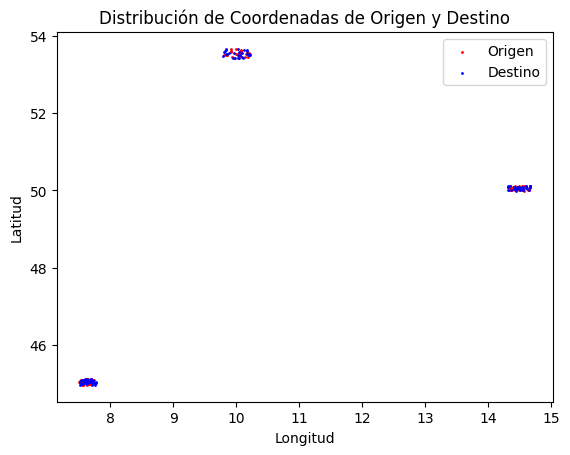

In [30]:
# Extraer las coordenadas de origen (longitud y latitud)
df[['origin_longitud', 'origin_latitud']] = df['origin_coord'].str.extract(r'POINT \((.*?) (.*?)\)').astype(float)

# Extraer las coordenadas de destino (longitud y latitud)
df[['destination_longitud', 'destination_latitud']] = df['destination_coord'].str.extract(r'POINT \((.*?) (.*?)\)').astype(float)

marker_size = 1
# Crear un gráfico de dispersión 2D
plt.scatter(df['origin_longitud'], df['origin_latitud'], color='red', label='Origen', s=marker_size)
plt.scatter(df['destination_longitud'], df['destination_latitud'], color='blue', label='Destino', s=marker_size)

# Etiquetas y leyenda
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(loc='best')

# Mostrar el gráfico
plt.title('Distribución de Coordenadas de Origen y Destino')
plt.show()


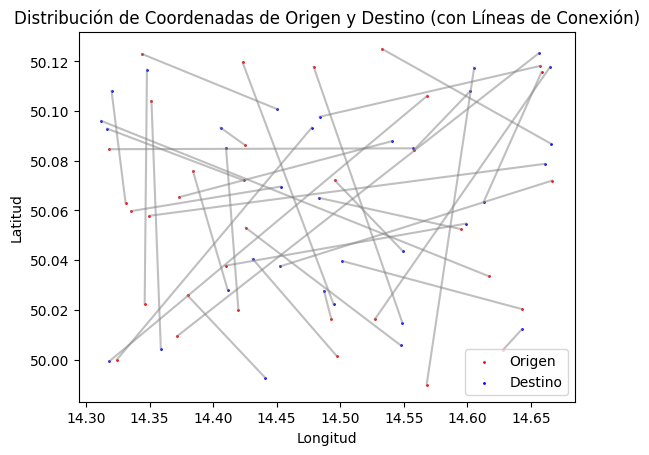

In [31]:
df_prague = df[df['region']=="Prague"].copy()

# Extraer las coordenadas de origen (longitud y latitud)
df_prague[['origin_longitud', 'origin_latitud']] = df_prague['origin_coord'].str.extract(r'POINT \((.*?) (.*?)\)').astype(float)

# Extraer las coordenadas de destino (longitud y latitud)
df_prague[['destination_longitud', 'destination_latitud']] = df_prague['destination_coord'].str.extract(r'POINT \((.*?) (.*?)\)').astype(float)

# Tamaño más pequeño de los marcadores
marker_size = 1

# Crear un gráfico de dispersión 2D con tamaño de marcador más pequeño
plt.scatter(df_prague['origin_longitud'], df_prague['origin_latitud'], color='red', label='Origen', s=marker_size)
plt.scatter(df_prague['destination_longitud'], df_prague['destination_latitud'], color='blue', label='Destino', s=marker_size)

# Etiquetas y leyenda
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(loc='best')

# Trazar líneas entre los puntos de origen y destino en el mismo registro
for index, row in df_prague.iterrows():
    plt.plot([row['origin_longitud'], row['destination_longitud']], [row['origin_latitud'], row['destination_latitud']], color='gray', alpha=0.5)

# Mostrar el gráfico
plt.title('Distribución de Coordenadas de Origen y Destino (con Líneas de Conexión)')
plt.show()

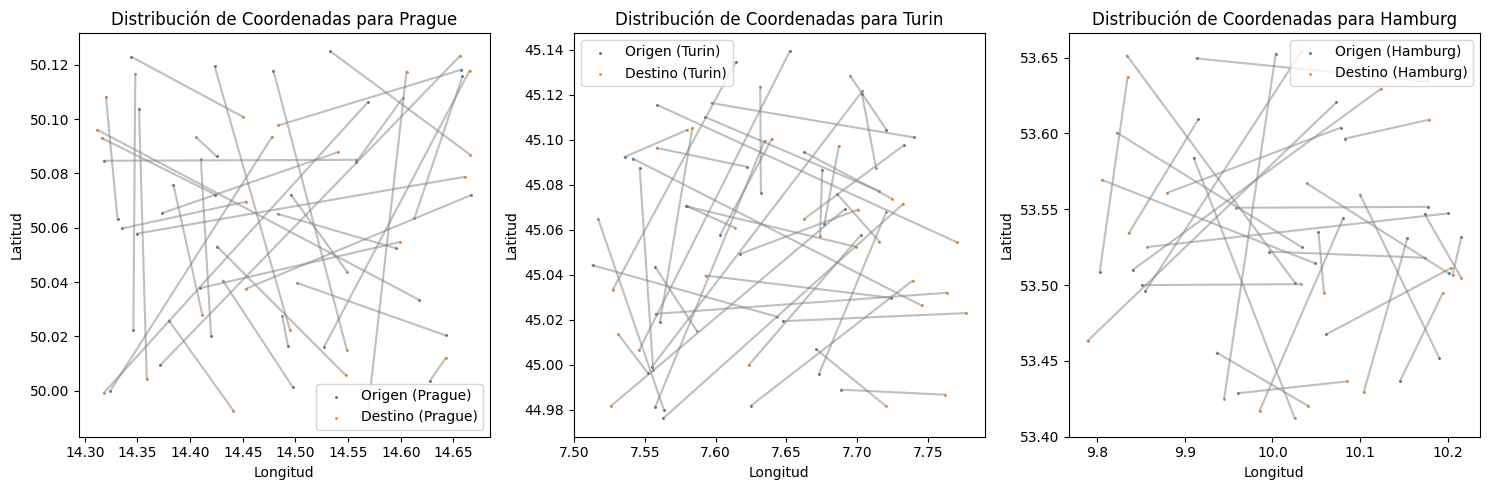

In [32]:
regiones_unicas = df['region'].unique()

# Tamaño de marcador
marker_size = 1

# Crear tres gráficos de dispersión 2D, uno para cada región única
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 fila y 3 columnas para los subplots

for i, region in enumerate(regiones_unicas):
    # Filtrar las filas para la región actual
    region_df = df[df['region'] == region].copy()
    # Extraer las coordenadas de origen (longitud y latitud)
    region_df[['origin_longitud', 'origin_latitud']] = region_df['origin_coord'].str.extract(r'POINT \((.*?) (.*?)\)').astype(float)
    # Extraer las coordenadas de destino (longitud y latitud)
    region_df[['destination_longitud', 'destination_latitud']] = region_df['destination_coord'].str.extract(r'POINT \((.*?) (.*?)\)').astype(float)

    # Crear un gráfico de dispersión 2D para la región actual
    axes[i].scatter(region_df['origin_longitud'], region_df['origin_latitud'], label=f'Origen ({region})', s=marker_size)
    axes[i].scatter(region_df['destination_longitud'], region_df['destination_latitud'], label=f'Destino ({region})', s=marker_size)
    
    # Unir los puntos de inicio y destino con líneas rectas
    for index, row in region_df.iterrows():
        axes[i].plot([row['origin_longitud'], row['destination_longitud']], [row['origin_latitud'], row['destination_latitud']], color='gray', alpha=0.5)
    
    # Etiquetas y leyenda
    axes[i].set_xlabel('Longitud')
    axes[i].set_ylabel('Latitud')
    axes[i].set_title(f'Distribución de Coordenadas para {region}')
    axes[i].legend(loc='best')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [33]:
# Parsear la columna de fecha y hora
df['datetime'] = pd.to_datetime(df['datetime'])

# Crear una nueva columna para los intervalos de 6 horas
intervalos = pd.cut(df['datetime'].dt.hour, bins=range(0, 25, 6), labels=['00:00 - 05:59', '06:00 - 11:59', '12:00 - 17:59', '18:00 - 23:59'])
df['intervalo'] = intervalos

# Agrupar por región y los intervalos de 6 horas
grupos = df.groupby(['region', 'intervalo'])

# Aplicar funciones de agregación, por ejemplo, contar la cantidad de filas en cada grupo
resumen = grupos.size().reset_index(name='count')
resumen

C:\Users\Lorens\AppData\Local\Temp\ipykernel_15612\4240596815.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupos = df.groupby(['region', 'intervalo'])


,region,intervalo,count
0,Hamburg,00:00 - 05:59,8
1,Hamburg,06:00 - 11:59,11
2,Hamburg,12:00 - 17:59,5
3,Hamburg,18:00 - 23:59,3
4,Prague,00:00 - 05:59,15
5,Prague,06:00 - 11:59,9
6,Prague,12:00 - 17:59,3
7,Prague,18:00 - 23:59,7
8,Turin,00:00 - 05:59,12
9,Turin,06:00 - 11:59,10
